In [16]:
import pandas as pd
import numpy as np
import uncertainties as unc
import matplotlib.pyplot as plt

         Peak1  Peak1Error        Peak2  Peak2Error
0  6836.326308    2.157913  7759.866736    2.437965
1  6852.757914    2.402915  7768.338505    2.191313
2  6839.659679    2.087664  7758.125360    2.219657
[6842.914633534558, 7762.110200135902]
[1.281879308971989, 1.3196128247915784]


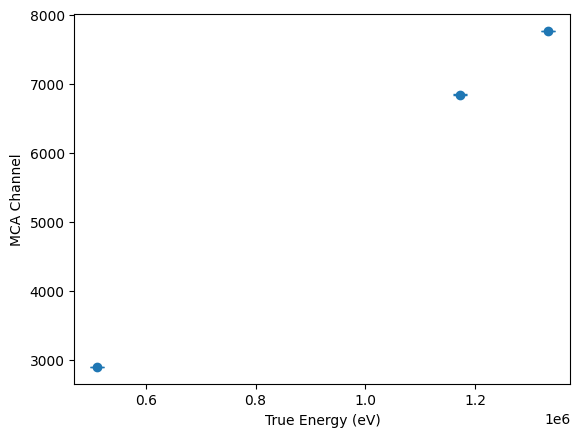

In [18]:
#co60
co60 = pd.read_csv('co60Fits.csv')
print(co60)
trueVals = [1173.2e3, 1332.5e3, 511e3]
mcaChannelsMean = []
mcaChannelsError = []
for i in range(2):
    peaks = 0
    for j in range(3):
        peaks += unc.ufloat(co60.iloc[j,i*2], co60.iloc[j,(i)*2+1])
    peaks = peaks/3
    mcaChannelsMean.append(peaks.n)
    mcaChannelsError.append(peaks.s)
print(mcaChannelsMean)
print(mcaChannelsError)
na22 = pd.read_csv('na22Fits.csv')

peaks = 0
for j in range(3):
    peaks += unc.ufloat(na22.iloc[j,0], na22.iloc[j,1])
peaks = peaks/3
mcaChannelsMean.append(peaks.n)
mcaChannelsError.append(peaks.s)

plt.errorbar(trueVals, mcaChannelsMean, yerr=mcaChannelsError, fmt='o', capsize=5)
plt.xlabel('True Energy (eV)')
plt.ylabel('MCA Channel')
plt.show()
    